In [5]:
import pandas as pd 
from pandas import DataFrame as df
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [7]:
movies_path = './Desktop/ml-latest-small/movies.csv'
movies_df = pd.read_csv(movies_path)

In [8]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
# Visualization 1
movies_df['genres_arr'] = movies_df['genres'].str.split('|')
#movies_df.head()
counter_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

movies_df.set_index('movieId')
movies_df.head()

,movieId,title,genres,genres_arr,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


{'Adventure': 1117, 'Animation': 447, 'Children': 583, 'Comedy': 3315, 'Fantasy': 654, 'Romance': 1545, 'Drama': 4365, 'Action': 1545, 'Crime': 1100, 'Thriller': 1729, 'Horror': 877, 'Mystery': 543, 'Sci-Fi': 792, 'Documentary': 495, 'IMAX': 153, 'War': 367, 'Musical': 394, 'Western': 168, 'Film-Noir': 133, '(no genres listed)': 18}


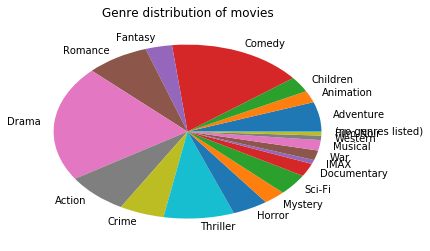

In [17]:
from collections import Counter

flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]

genre_dict = dict(Counter(flattened_genres))

print(genre_dict)

# now lets plot this genre distribution as a pie chart
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

#plt.savefig('./movie-genres-pie.png')

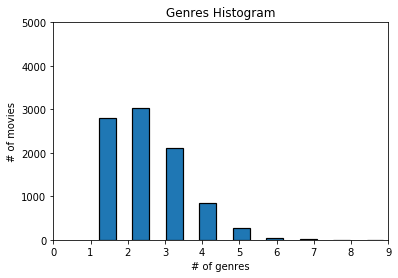

{'Adventure': 1117, 'Animation': 447, 'Children': 583, 'Comedy': 3315, 'Fantasy': 654, 'Romance': 1545, 'Drama': 4365, 'Action': 1545, 'Crime': 1100, 'Thriller': 1729, 'Horror': 877, 'Mystery': 543, 'Sci-Fi': 792, 'Documentary': 495, 'IMAX': 153, 'War': 367, 'Musical': 394, 'Western': 168, 'Film-Noir': 133, '(no genres listed)': 18}


In [39]:
# Number of genres against number of movies
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(movies_df.genre_count,edgecolor='black', linewidth=1.2)
plt.title("Genres Histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0, 9, 0, 5000])
plt.show()

#List of genres
from collections import Counter
flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]
genre_dict = dict(Counter(flattened_genres))
print(genre_dict)

[]

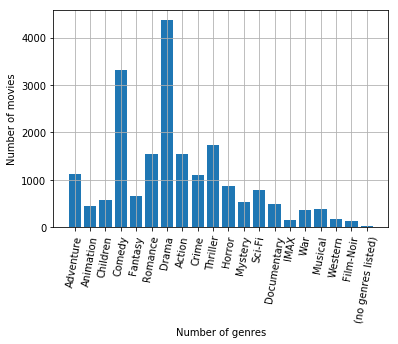

In [36]:
# For better readability
x = list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.xlabel("Number of genres")
plt.ylabel("Number of movies")
plt.grid()
plt.plot()

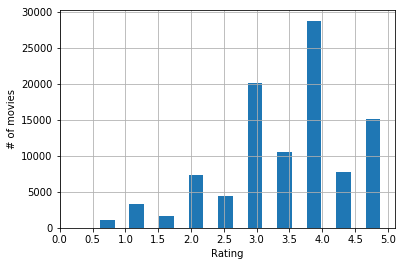

In [53]:
# Histogram of movie ratings
plt.hist(ratings_df.rating,rwidth=0.5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [24]:
ratings_path = './Desktop/ml-latest-small/ratings.csv'
ratings_df = pd.read_csv(ratings_path)

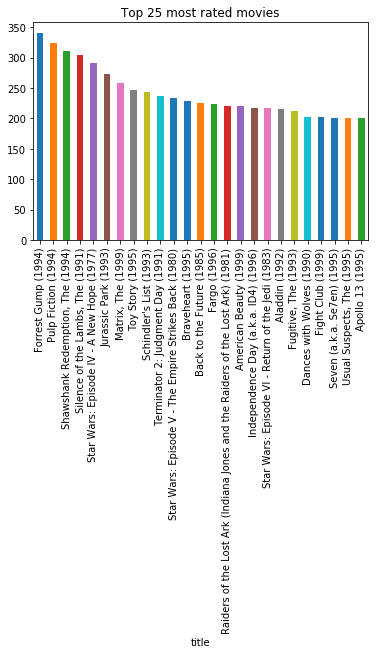

In [55]:
# Top 25 movies
#users=pd.read_csv("./Desktop/ml-latest-small/ratings.csv")
ratings = pd.read_csv('./Desktop/ml-latest-small/ratings.csv')
movies = pd.read_csv('./Desktop/ml-latest-small/movies.csv')
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)

most_rated=movielens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 most rated movies",label="count")